In [1]:
%matplotlib inline


### Unsupervised Data Analysis : Principal Component Analysis

Welcome to the "Unsupervised Data Analysis : Principal Component Analysis" practical session.  

Programming Language : Python 
Editor : Jupyter Notebook. 

Pandas : Data loading, processing, transformation and manipulation.
Scikit-learn : Example data source, ML and statistical analysis


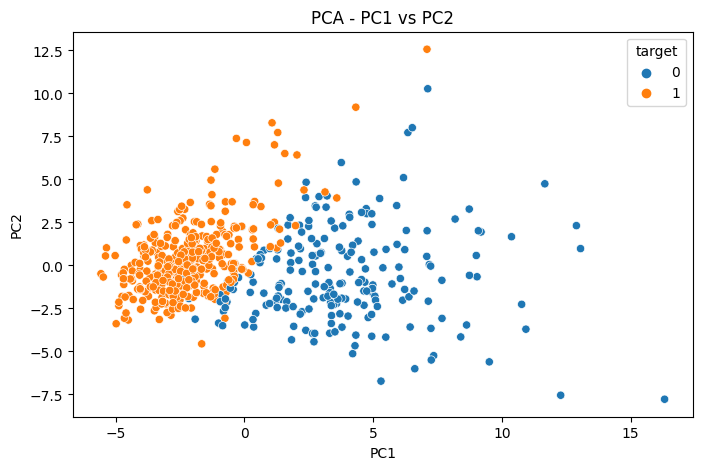

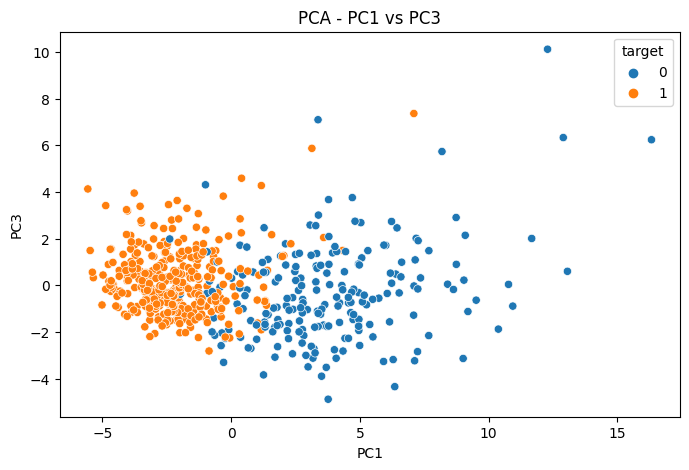

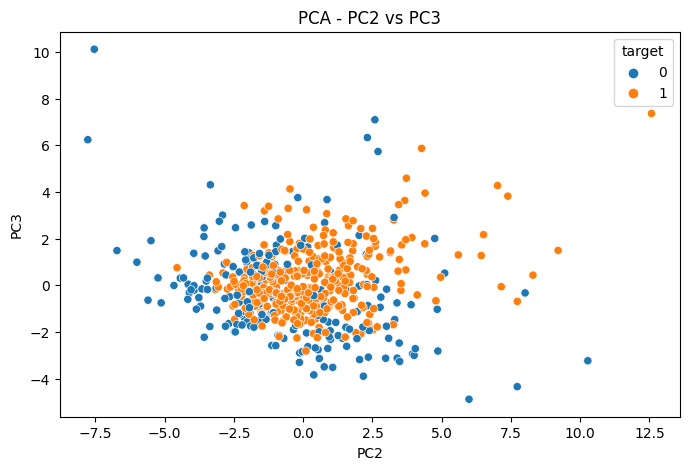

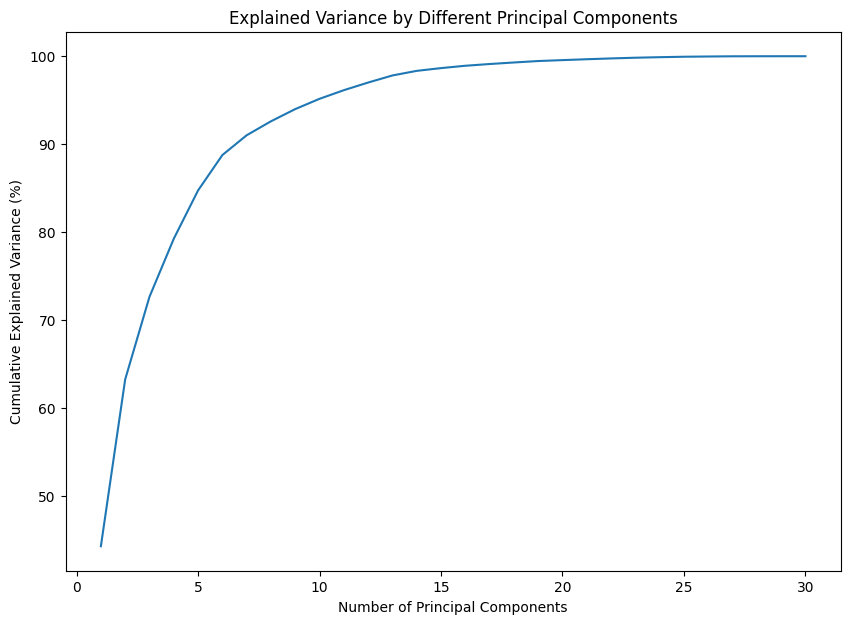

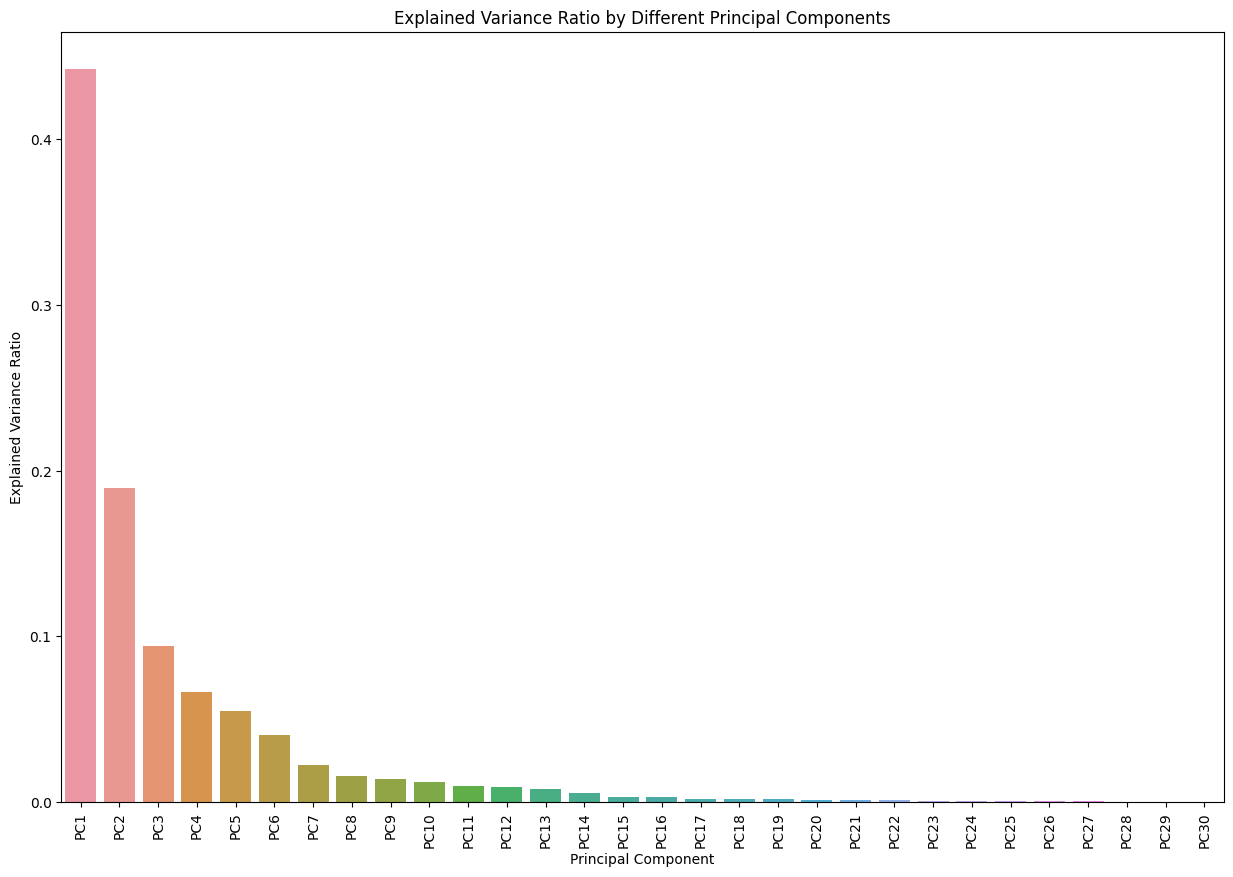

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Convert principal components into a pandas DataFrame
df_pca = pd.DataFrame(data=df_pca, columns=[f'PC{i}' for i in range(1, len(df.columns) + 1)])



# Visualize different combinations of principal components
df_pca['target'] = data.target
combinations = [('PC1', 'PC2'), ('PC1', 'PC3'), ('PC2', 'PC3')]
for combo in combinations:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_pca, x=combo[0], y=combo[1], hue='target')
    plt.title(f'PCA - {combo[0]} vs {combo[1]}')
    plt.show()


# Explained variance plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(df.columns) + 1), 100*pca.explained_variance_ratio_.cumsum())
plt.title('Explained Variance by Different Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.show()

# Explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame for easier plotting
df_explained_variance = pd.DataFrame({'PC': [f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)], 
                                      'Explained Variance Ratio': explained_variance_ratio})

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(x='PC', y='Explained Variance Ratio', data=df_explained_variance)
plt.title('Explained Variance Ratio by Different Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=90)
plt.show()



### Your Task
Now your task is to perform a similar analysis on the iris data set. 

Task 1 : Load the iris data set.
Task 2 : Standardize the data

Task 3 : Run PCA analysis
Task 4 : Note down what are the contributions of PC1, PC2 and PC3. 
Task 5 : Plot PC1 and PC2 and overlay the actual iris data label on the plot. 
Task 6 : Plot PC1 and PC3 and overlay the actual iris data label on the plot. 


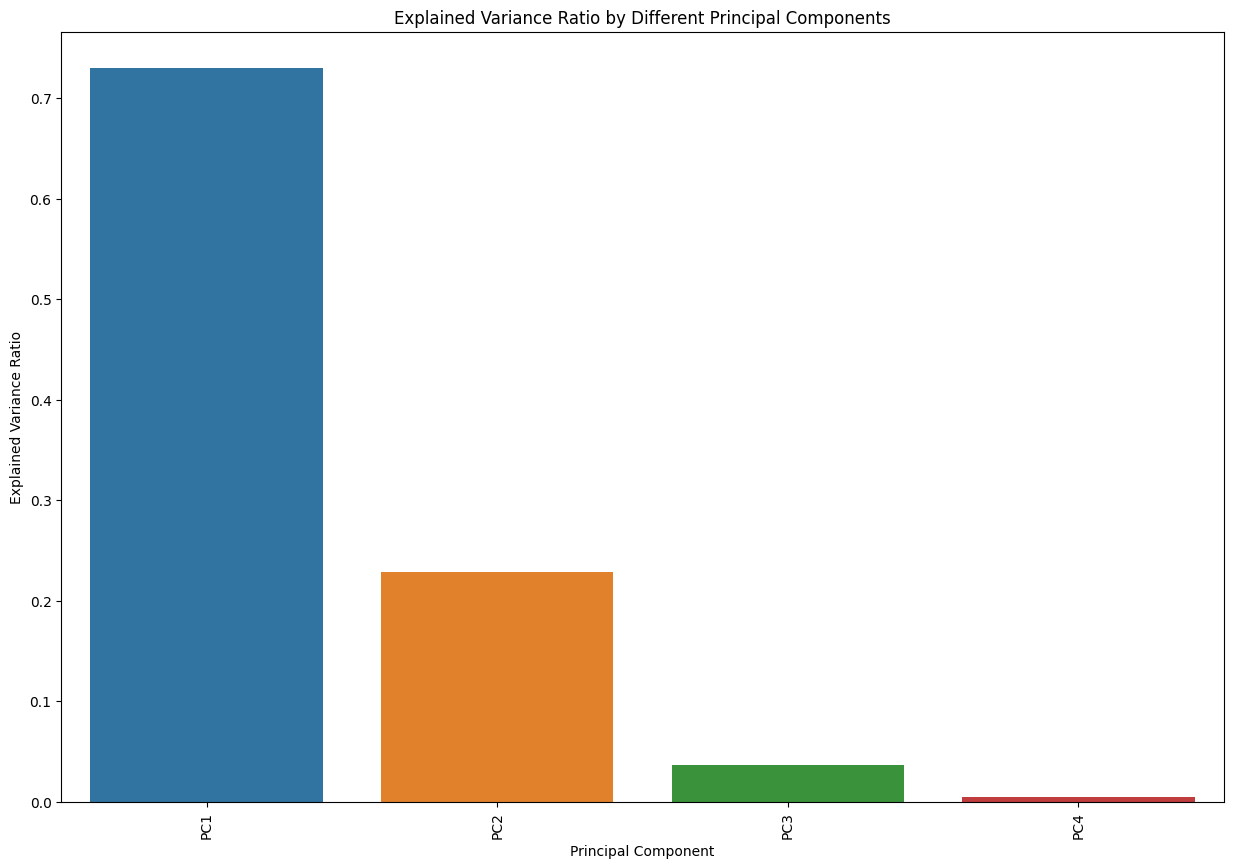

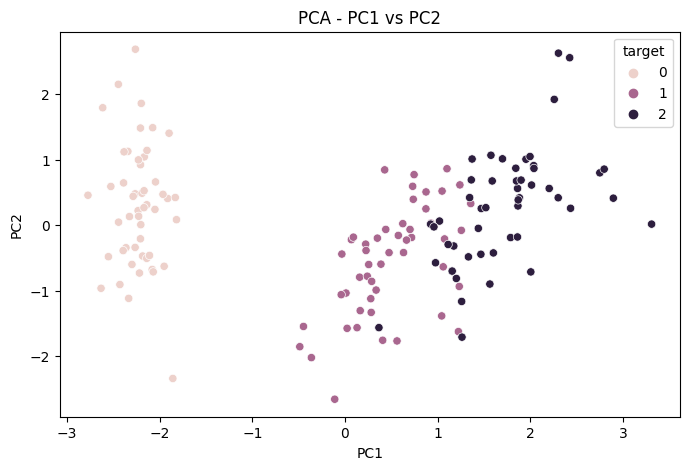

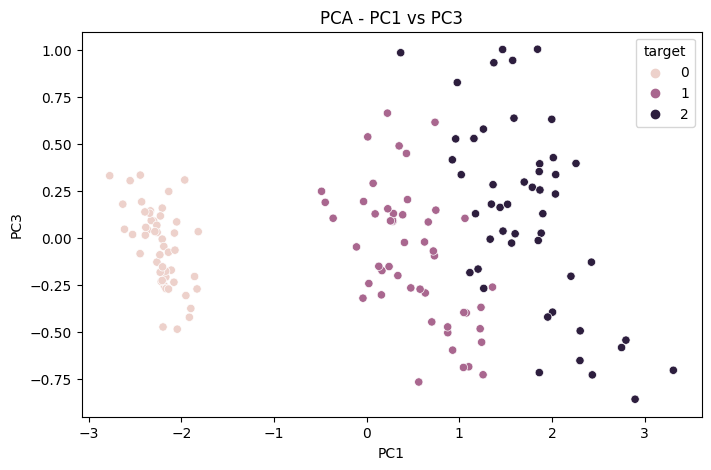

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## ---------------- ##
## Complet Task 1 : Load the iris data set.
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

## ---------------- ##
## Complet Task 2 : # Standardize features to have zero mean and unit variance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)



## ---------------- ##
## Complete Task 3 : Run PCA analysis
pca = PCA()
df_pca = pca.fit_transform(df_scaled)
# Convert principal components into a pandas DataFrame
df_pca = pd.DataFrame(data=df_pca, columns=[f'PC{i}' for i in range(1, len(df.columns) + 1)])

## ---------------- ##
## Complete Task 4 : Note down what are the contributions of PC1, PC2 and PC3. 
# Explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame for easier plotting
df_explained_variance = pd.DataFrame({'PC': [f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)], 
                                      'Explained Variance Ratio': explained_variance_ratio})
## ---------------- ##
## Complete Task 5 : Plot PC1 and PC2 and overlay the actual iris data label on the plot.  
plt.figure(figsize=(15, 10))
sns.barplot(x='PC', y='Explained Variance Ratio', data=df_explained_variance)
plt.title('Explained Variance Ratio by Different Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=90)
plt.show()


## Complete Task 5 : Plot PC1 and PC2 and overlay the actual iris data label 'target' on the plot.  
df_pca['target'] = data.target
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target')
plt.title(f'PCA - PC1 vs PC2')
plt.show()


## Complete Task 6 : Plot PC1 and PC3 and overlay the actual iris data label 'target' on the plot.  
df_pca['target'] = data.target
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC3', hue='target')
plt.title(f'PCA - PC1 vs PC3')
plt.show()
